In [2]:
import pandas as pd

# Path to the CSV file in your Google Drive
file_path = '/water_potability.csv'
df = pd.read_csv(file_path)
print(df.head())


         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [5]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import classification_report, confusion_matrix


In [6]:
#import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset
# Replace 'water_quality.csv' with the path to your dataset
#data = pd.read_csv('water_quality.csv')

# Check for missing values
print(df.isnull().sum())

# Fill missing values with mean of the column
df.fillna(df.mean(), inplace=True)

# Features and target variable
X = df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = df['Potability']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# Anomaly Detection using Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
anomalies = iso_forest.fit_predict(X)

# # Add anomalies to the dataset
# data['Anomaly'] = anomalies

# # Display the anomalies
# print(data[data['Anomaly'] == -1])

# # Save the model (optional)
# import joblib
# joblib.dump(rf_model, 'water_quality_rf_model.pkl')
# joblib.dump(iso_forest, 'water_quality_iso_forest.pkl')


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64
Accuracy: 0.688708036622584
              precision    recall  f1-score   support

           0       0.70      0.89      0.78       617
           1       0.65      0.36      0.46       366

    accuracy                           0.69       983
   macro avg       0.67      0.62      0.62       983
weighted avg       0.68      0.69      0.66       983



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Accuracy: 0.688708036622584
              precision    recall  f1-score   support

           0       0.70      0.89      0.78       617
           1       0.65      0.36      0.46       366

    accuracy                           0.69       983
   macro avg       0.67      0.62      0.62       983
weighted avg       0.68      0.69      0.66       983



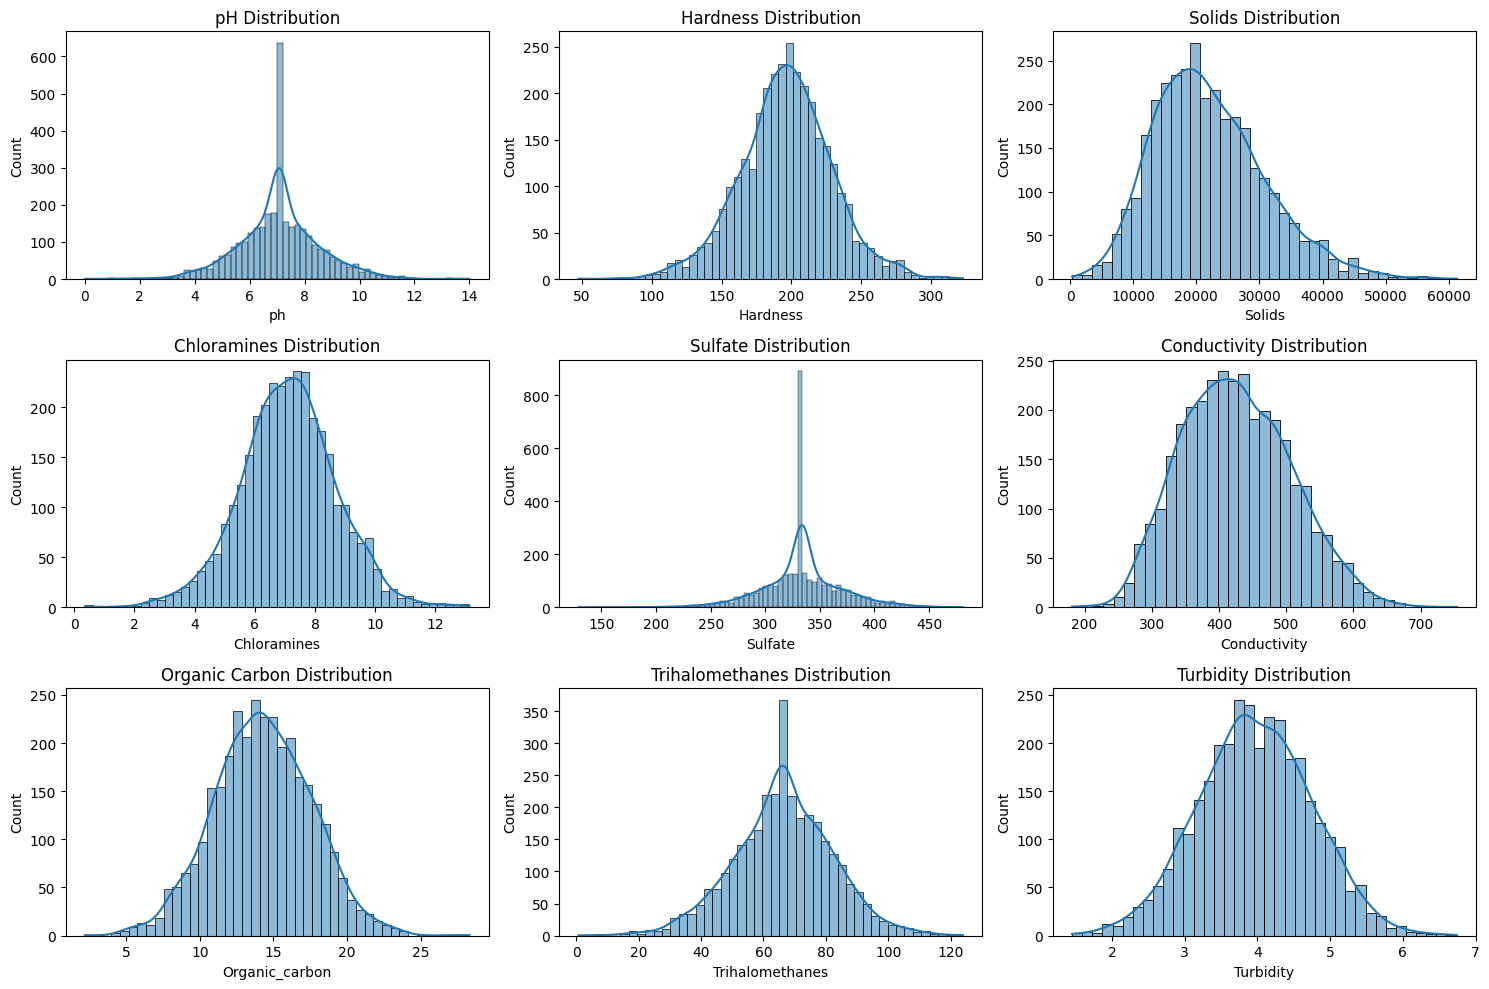

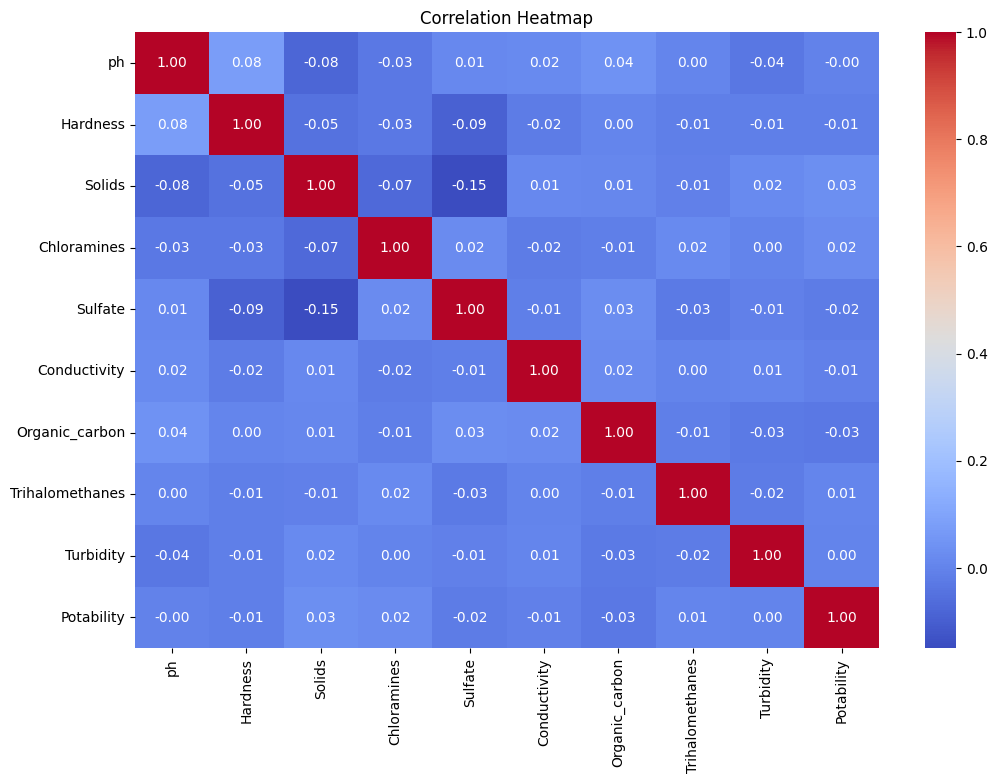

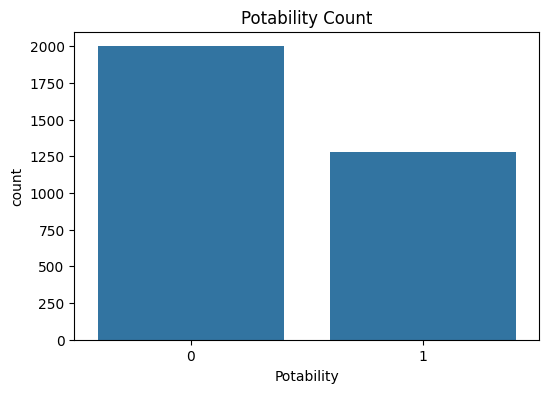

In [8]:

import matplotlib.pyplot as plt
import seaborn as sns

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# Visualization of water quality parameters
plt.figure(figsize=(15, 10))

# pH distribution
plt.subplot(3, 3, 1)
sns.histplot(df['ph'], kde=True)
plt.title('pH Distribution')

# Hardness distribution
plt.subplot(3, 3, 2)
sns.histplot(df['Hardness'], kde=True)
plt.title('Hardness Distribution')

# Solids distribution
plt.subplot(3, 3, 3)
sns.histplot(df['Solids'], kde=True)
plt.title('Solids Distribution')

# Chloramines distribution
plt.subplot(3, 3, 4)
sns.histplot(df['Chloramines'], kde=True)
plt.title('Chloramines Distribution')

# Sulfate distribution
plt.subplot(3, 3, 5)
sns.histplot(df['Sulfate'], kde=True)
plt.title('Sulfate Distribution')

# Conductivity distribution
plt.subplot(3, 3, 6)
sns.histplot(df['Conductivity'], kde=True)
plt.title('Conductivity Distribution')

# Organic Carbon distribution
plt.subplot(3, 3, 7)
sns.histplot(df['Organic_carbon'], kde=True)
plt.title('Organic Carbon Distribution')

# Trihalomethanes distribution
plt.subplot(3, 3, 8)
sns.histplot(df['Trihalomethanes'], kde=True)
plt.title('Trihalomethanes Distribution')

# Turbidity distribution
plt.subplot(3, 3, 9)
sns.histplot(df['Turbidity'], kde=True)
plt.title('Turbidity Distribution')

plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Potability counts
plt.figure(figsize=(6, 4))
sns.countplot(x='Potability', data=df)
plt.title('Potability Count')
plt.show()
